# Carregando a base de dados 

In [1]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

# The digits dataset
digits = datasets.load_digits()

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits.images.shape

(1797, 8, 8)

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

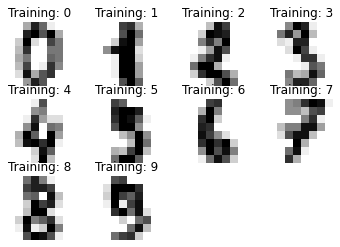

In [7]:
# Visualizando as imagens e classes

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [8]:
# Convertendo os dados para um dataframe 
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) # Reshape com núm de linhas = n_samples e núm de colunas automatico (-1)
classe = digits.target

In [10]:
import pandas as pd

dataset = pd.DataFrame(data)
dataset['classe'] = classe

In [11]:
# Dataset com 64 features (8 x 8 pixels)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Etapa de treinamento do modelo 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('classe', axis=1), dataset['classe'], test_size=0.3)

In [13]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1257, 64) (540, 64)
(1257,) (540,)


In [14]:
# Instanciação do modelo
knn = KNeighborsClassifier(n_neighbors=3)

# Treinamento do modelo
knn.fit(X_train, y_train)

# Predição do modelo
y_pred = knn.predict(X_test)

## Métricas para avaliação do modelo 

In [15]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       0.93      1.00      0.97        57
           2       1.00      0.98      0.99        57
           3       0.96      1.00      0.98        53
           4       1.00      1.00      1.00        52
           5       1.00      0.98      0.99        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        47
           8       0.96      0.92      0.94        53
           9       0.98      0.95      0.97        60

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [17]:
# Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['          Predito'], margins=True))

          Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                          
0                  61   0   0   0   0   0   0   0   0   0   61
1                   0  57   0   0   0   0   0   0   0   0   57
2                   0   0  56   1   0   0   0   0   0   0   57
3                   0   0   0  53   0   0   0   0   0   0   53
4                   0   0   0   0  52   0   0   0   0   0   52
5                   0   0   0   0   0  46   0   0   0   1   47
6                   0   0   0   0   0   0  53   0   0   0   53
7                   0   0   0   0   0   0   0  47   0   0   47
8                   0   3   0   1   0   0   0   0  49   0   53
9                   0   1   0   0   0   0   0   0   2  57   60
All                61  61  56  55  52  46  53  47  51  58  540


## Melhorando o nosso algoritmo

### Cross-Validation

Técnica de validação que gera um conjunto de treino e teste diferente a cada iteração (cv), de modo que ao final conseguimos eliminar a variância que teríamos no nosso conjunto de treino e teste.

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, dataset.drop('classe', axis=1), dataset['classe'], cv=5)
scores

array([0.95555556, 0.95833333, 0.96657382, 0.98607242, 0.96657382])

### Grid-Search para otimização do parâmetro *K*

Grid-Search é uma técnica de busca exaustiva dos melhores parâmetros de uma modelo a partir de um conjunto de combinações de hiper-parâmetros.

In [19]:
from sklearn.model_selection import GridSearchCV

k_list = list(range(1, 51))

k_values = dict(n_neighbors=k_list)

# Instânciando o objeto GridSearch
# GridSearchCV(algoritmo, lista_valores, cross_validation, métrica)
grid_search = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

# Treinando o objeto
grid_search.fit(dataset.drop('classe', axis=1), dataset['classe'])

# Não dividimos entre conjunto de treino e teste dados que o CV já faz isso
print(grid_search.cv_results_)

{'mean_fit_time': array([0.00682535, 0.00448289, 0.00297899, 0.00292225, 0.00298243,
       0.00289464, 0.00286326, 0.00299983, 0.00298553, 0.00317688,
       0.00335164, 0.00325108, 0.00428357, 0.00339112, 0.00291972,
       0.002947  , 0.00297346, 0.00284715, 0.00289073, 0.00281525,
       0.00413027, 0.00297661, 0.00309911, 0.00331488, 0.00348563,
       0.00341377, 0.00324864, 0.00297356, 0.0029038 , 0.00311594,
       0.00477481, 0.00282135, 0.00288835, 0.00306911, 0.0029974 ,
       0.00312395, 0.00357094, 0.00337405, 0.00291944, 0.00298438,
       0.00362167, 0.00328975, 0.00500951, 0.00297213, 0.00295525,
       0.00290127, 0.0036243 , 0.00305753, 0.00346746, 0.00328112]), 'std_fit_time': array([3.78483768e-03, 3.10062517e-03, 1.21723311e-04, 5.96460961e-05,
       1.24400262e-04, 7.90951974e-05, 1.60868773e-05, 1.82902539e-04,
       2.35964996e-04, 1.93576706e-04, 5.65309293e-04, 6.40916379e-04,
       1.27893536e-03, 5.04363098e-04, 1.43174468e-04, 7.20769925e-05,
       1.7

In [20]:
# Best parameters
print("grid.best_params_: {}; grid.best_score_: {}".format(grid_search.best_params_, grid_search.best_score_))

grid.best_params_: {'n_neighbors': 2}; grid.best_score_: 0.9671711544413494


In [21]:
# Visualização dos valores de K e acurácia
grid_search.cv_results_["mean_test_score"]

array([0.96439338, 0.96717115, 0.96662179, 0.96384092, 0.96272826,
       0.95938564, 0.95994584, 0.95772052, 0.95661096, 0.95494274,
       0.9554983 , 0.95605231, 0.95549675, 0.95605076, 0.95438254,
       0.95438409, 0.95326679, 0.94937481, 0.95048437, 0.94937326,
       0.94881925, 0.94937635, 0.9482637 , 0.94882389, 0.94548128,
       0.94548282, 0.94380997, 0.94324977, 0.94102755, 0.94102445,
       0.93991024, 0.94102136, 0.94046425, 0.93879294, 0.93657227,
       0.9343454 , 0.93434386, 0.93322965, 0.93100433, 0.93211699,
       0.92989322, 0.93045032, 0.92933767, 0.93044878, 0.93100433,
       0.93100433, 0.92822037, 0.92822037, 0.92710925, 0.92599505])

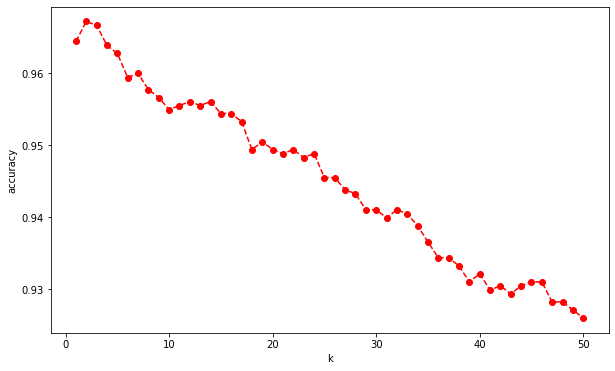

In [22]:
plt.figure(figsize=(10,6))
plt.plot(k_list, grid_search.cv_results_["mean_test_score"], color='red', linestyle='dashed', marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()